# Problem Statement

Risk Strtification prior to PCI

## Importing Libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

## Importing dataset

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
path = '/content/drive/MyDrive/Major Project/aa_data.csv'
df = pd.read_csv(path)

Display entire data

In [48]:
df=df[['Age','Sex','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','Risk_Prediction']].copy()
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Risk_Prediction
0,40,M,140,289,0,Normal,172,0
1,49,F,160,180,0,Normal,156,1
2,37,M,130,283,0,ST,98,0
3,48,F,138,214,0,Normal,108,1
4,54,M,150,195,0,Normal,122,0
...,...,...,...,...,...,...,...,...
913,45,M,110,264,0,Normal,132,1
914,68,M,144,193,1,Normal,141,1
915,57,M,130,131,0,Normal,115,1
916,57,F,130,236,0,LVH,174,1


## Encoding Categorical Data

In [49]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['RestingECG']= label_encoder.fit_transform(df['RestingECG'])
df['RestingECG'].unique()


array([1, 2, 0])

In [50]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Sex'].unique()


array([1, 0])

## Data Preprocessing

In [52]:
df.isna().sum()

Age                0
Sex                0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
Risk_Prediction    0
dtype: int64

In [53]:
df.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Risk_Prediction
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,198.799564,0.233115,0.989107,136.809368,0.553377
std,9.432617,0.407701,18.514154,109.384145,0.423046,0.631671,25.460334,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,1.000000,138.000000,1.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000


In [54]:
df.groupby('RestingECG').size()

RestingECG
0    188
1    552
2    178
dtype: int64

In [55]:
df.groupby('Sex').size()

Sex
0    193
1    725
dtype: int64

## Visualization

Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7be7a1150>,
      dtype=object)

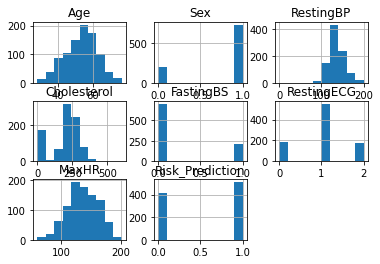

In [58]:
df.hist()

Boxplot

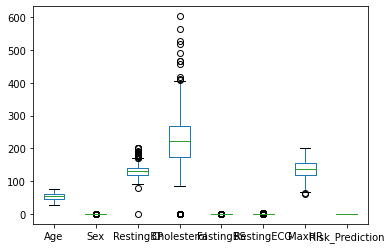

In [59]:
df.plot(kind = 'box') 

Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7c8a58550>,
      dtype=object)

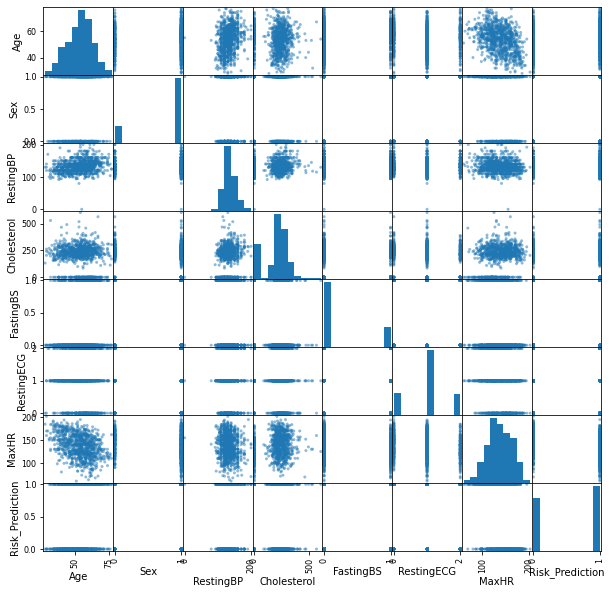

In [60]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10,10))

## 1. Decision Tree Model

In [61]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print (X)

     Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR
0     40    1        140          289          0           1    172
1     49    0        160          180          0           1    156
2     37    1        130          283          0           2     98
3     48    0        138          214          0           1    108
4     54    1        150          195          0           1    122
..   ...  ...        ...          ...        ...         ...    ...
913   45    1        110          264          0           1    132
914   68    1        144          193          1           1    141
915   57    1        130          131          0           1    115
916   57    0        130          236          0           0    174
917   38    1        138          175          0           1    173

[918 rows x 7 columns]


Splitting data into test and train

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=7)

print(X_train,y_train)

     Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR
239   48    1        160          193          0           1    102
504   62    1        158          210          1           1    112
451   64    1        144            0          0           2    122
192   48    1        130          245          0           1    160
422   65    1        150          236          1           2    105
..   ...  ...        ...          ...        ...         ...    ...
579   69    1        145          289          1           2    110
502   69    1        140          208          0           2    140
537   74    1        150          258          1           2    130
196   49    1        120          297          0           1    132
175   43    1        140          288          0           1    135

[642 rows x 7 columns] 239    1
504    1
451    1
192    0
422    1
      ..
579    1
502    1
537    1
196    0
175    1
Name: Risk_Prediction, Length: 642, dtype: int64


Training Data

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion= 'gini',
                             max_depth= 3,
                             min_samples_leaf= 1,
                             min_samples_split= 10,
                             splitter= 'random')
                            
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10, splitter='random')

In [64]:
y_pred = dtc.predict(X_test)

Checking Accuracy

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy of train data:",accuracy_score(y_train, dtc.predict(X_train)))

print("Accuracy of test data:",accuracy_score(y_test, dtc.predict(X_test)))

Accuracy of train data: 0.6526479750778816
Accuracy of test data: 0.6811594202898551


In [66]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, dtc.predict(X_test)))
print(classification_report(y_test, dtc.predict(X_test)))

[[ 47  81]
 [  7 141]]
              precision    recall  f1-score   support

           0       0.87      0.37      0.52       128
           1       0.64      0.95      0.76       148

    accuracy                           0.68       276
   macro avg       0.75      0.66      0.64       276
weighted avg       0.74      0.68      0.65       276



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


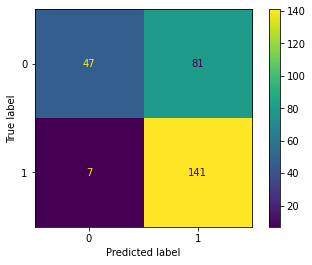

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc, X_test, y_test)  
#plt.show()

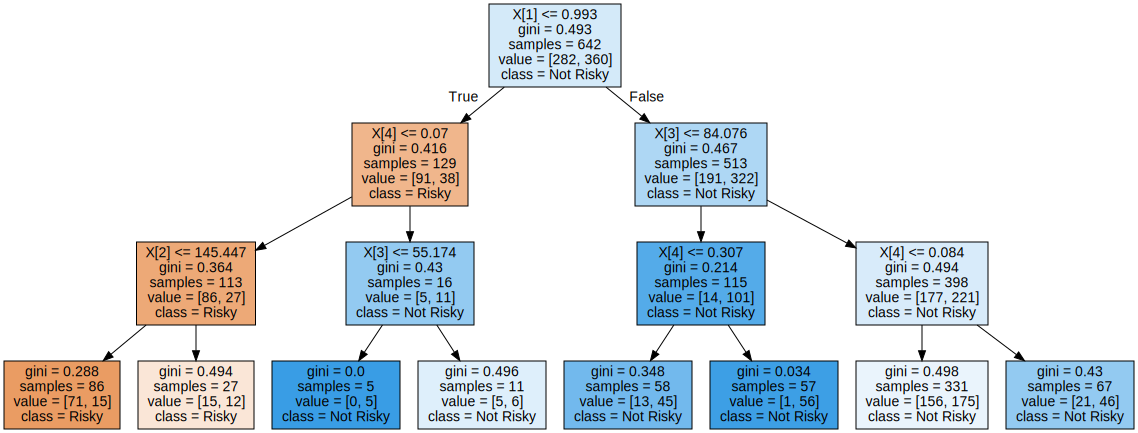

In [69]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None, 
                                #feature_names=X.columns,
                                class_names=['Risky', "Not Risky"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

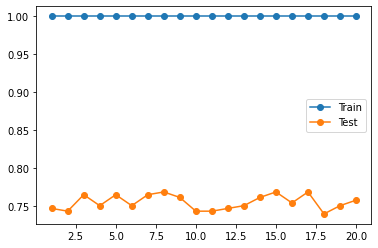

In [77]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
  clfm=RandomForestClassifier(n_estimators=100)
  clfm.fit(X_train, y_train)
	# evaluate on the train dataset
  train_yhat = clfm.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)
	# evaluate on the test dataset
  test_yhat = clfm.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_scores.append(test_acc)
  
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [88]:
imp_df = pd.DataFrame({"Varname" : X_train.columns, "Imp" : dtc.feature_importances_})

In [89]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
1,Sex,0.402888
3,Cholesterol,0.352866
4,FastingBS,0.191470
2,RestingBP,0.052776
0,Age,0.000000
5,RestingECG,0.000000
6,MaxHR,0.000000


## 2. Random Forest Model

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [79]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

In [80]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy of train data:",metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Accuracy of test data:",metrics.accuracy_score(y_test, clf.predict(X_test)))

Accuracy of train data: 1.0
Accuracy of test data: 0.7536231884057971


In [81]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test)))

[[ 88  40]
 [ 28 120]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       128
           1       0.75      0.81      0.78       148

    accuracy                           0.75       276
   macro avg       0.75      0.75      0.75       276
weighted avg       0.75      0.75      0.75       276



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


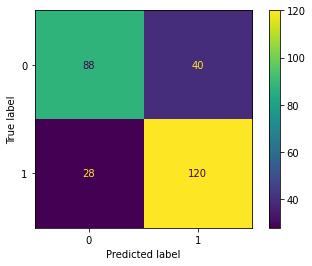

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
#plt.show()

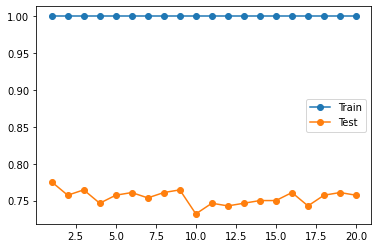

In [85]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
  clfm=RandomForestClassifier(n_estimators=100)
  clfm.fit(X_train, y_train)
	# evaluate on the train dataset
  train_yhat = clfm.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)
	# evaluate on the test dataset
  test_yhat = clfm.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_scores.append(test_acc)
  
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [86]:
imp_df = pd.DataFrame({"Varname" : X_train.columns, "Imp" : clf.feature_importances_})

In [87]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
6,MaxHR,0.272982
3,Cholesterol,0.232032
0,Age,0.205586
2,RestingBP,0.147725
1,Sex,0.056544
5,RestingECG,0.043018
4,FastingBS,0.042113


## Conclusion

***The Random Forest Algorithm combines the output of multiple (randomly created) Decision Trees to generate the final output***. <br>


Random forest leverages the power of multiple decision trees. It does not rely on the feature importance given by a single decision tree. That is why it performed better.
